# Faceting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/wU9M9gu.png" width="350px"/></td>
<td><img src="https://i.imgur.com/85d2nIj.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Facet Grid</td>
<td style="font-weight:bold; font-size:16px;">Pair Plot</td>
</tr>
<tr>
<td>sns.FacetGrid()</td>
<td>sns.pairplot()</td>
</tr>
<tr>
<td>Good for data with at least two categorical variables.</td>
<td>Good for exploring most kinds of data.</td>
</tr>
</table>

So far in this tutorial we've been plotting data in one (univariate) or two (bivariate) dimensions, and we've learned how plotting in `seaborn` works. In this section we'll dive deeper into `seaborn` by exploring **faceting**.

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

In this notebook we'll put this technique in action, and see why it's so useful.

In [24]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("../input/fifa-18-demo-player-dataset/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(Note: the first code cell above contains some data pre-processing. This is extraneous, and so I've hidden it by default.)

In [25]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [26]:
import seaborn as sns

## The FacetGrid

The core `seaborn` utility for faceting is the `FacetGrid`. A `FacetGrid` is an object which stores some information on how you want to break up your data visualization.

For example, suppose that we're interested in (as in the previous notebook) comparing strikers and goalkeepers in some way. To do this, we can create a `FacetGrid` with our data, telling it that we want to break the `Position` variable down by `col` (column).

Since we're zeroing in on just two positions in particular, this results in a pair of grids ready for us to "do" something with them:

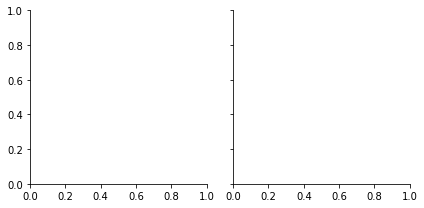

In [27]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")

From there, we use the `map` object method to plot the data into the laid-out grid.

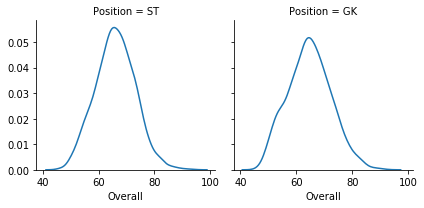

In [28]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

Passing a method into another method like this may take some getting used to, if this is your first time seeing this being done. But once you get used to it, `FacetGrid` is very easy to use.

By using an object to gather "design criteria", `seaborn` does an effective job seamlessly marrying the data *representation* to the data *values*, sparing us the need to lay the plot out ourselves.

We're probably interested in more than just goalkeepers and strikers, however. But if we squeezed all of the possible game positions into one row, the resulting plots would be tiny. `FacetGrid` comes equipped with a `col_wrap` parameter for dealing with this case exactly.

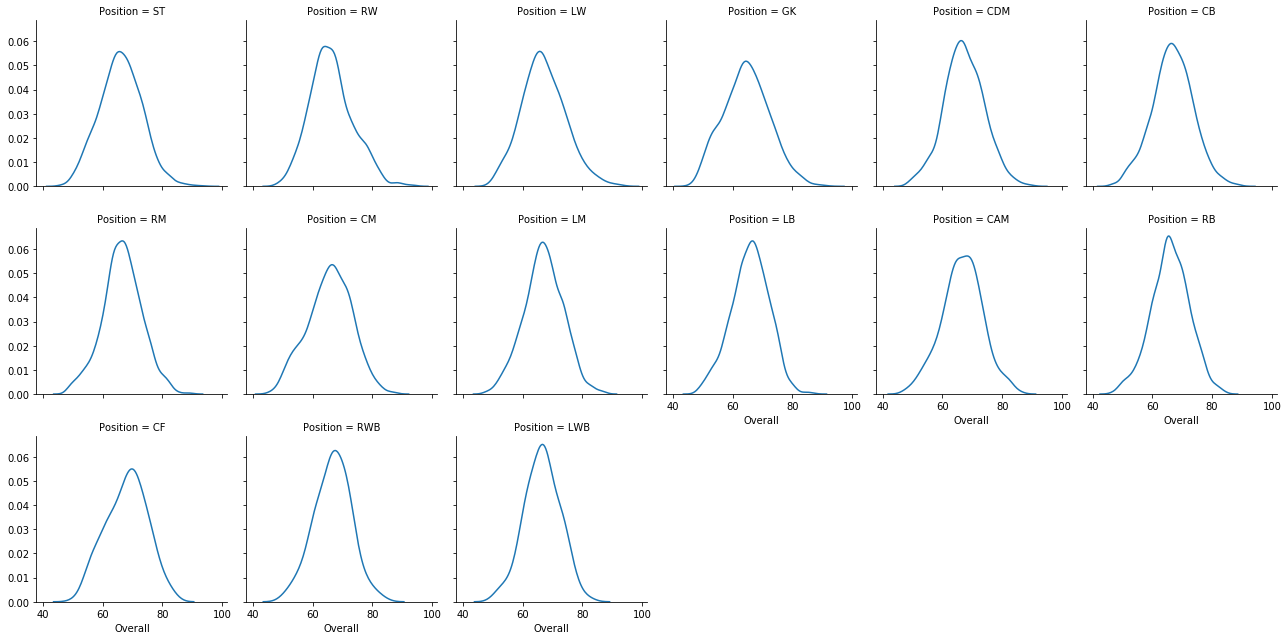

In [29]:
df = footballers

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

So far we've been dealing exclusively with one `col` (column) of data. The "grid" in `FacetGrid`, however, refers to the ability to lay data out by row *and* column.

For example, suppose we're interested in comparing the talent distribution for (goalkeepers and strikers specifically, to keep things succinct) across rival clubs Real Madrid, Atlético Madrid, and FC Barcelona.

As the plot below demonstrates, we can achieve this by passing `row=Position` and `col=Club` parameters into the plot.

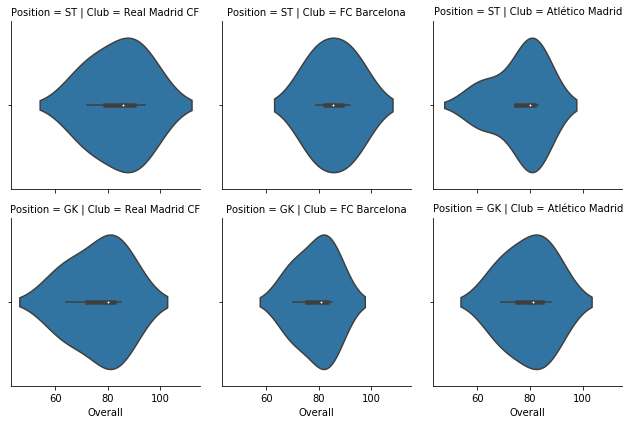

In [30]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall")

`FacetGrid` orders the subplots effectively arbitrarily by default. To specify your own ordering explicitly, pass the appropriate argument to the `row_order` and `col_order` parameters.

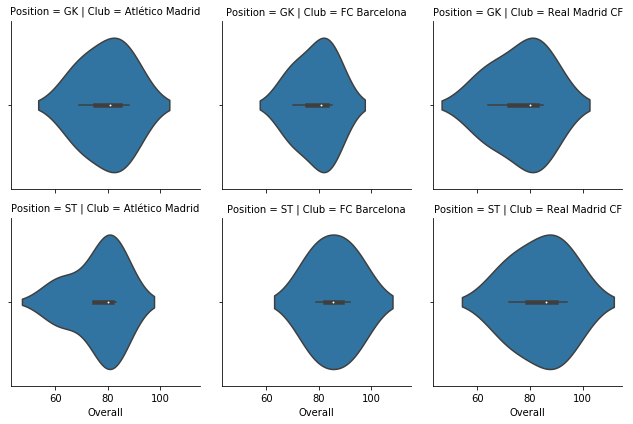

In [31]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club", 
                  row_order=['GK', 'ST'],
                  col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, "Overall")

`FacetGrid` comes equipped with various lesser parameters as well, but these are the most important ones.

## Why facet?

In a nutshell, faceting is the easiest way to make your data visualization multivariate.

Faceting is multivariate because after laying out one (categorical) variable in the rows and another (categorical) variable in the columns, we are already at two variables accounted for before regular plotting has even begun.

And faceting is easy because transitioning from plotting a `kdeplot` to gridding them out, as here, is very simple. It doesn't require learning any new visualization techniques. The limitations are the same ones that held for the plots you use inside.

Faceting does have some important limitations however. It can only be used to break data out across singular or paired categorical variables with very low numeracy&mdash;any more than five or so dimensions in the grid, and the plots become too small (or involve a lot of scrolling). Additionally it involves choosing (or letting Python) an order to plot in, but with nominal categorical variables that choice is distractingly arbitrary.

Nevertheless, faceting is an extremely useful and applicable tool to have in your toolbox.

## Pairplot

Now that we understand faceting, it's worth taking a quick once-over of the `seaborn` `pairplot` function.

`pairplot` is a very useful and widely used `seaborn` method for faceting *variables* (as opposed to *variable values*). You pass it a `pandas` `DataFrame` in the right shape, and it returns you a gridded result of your variable values:

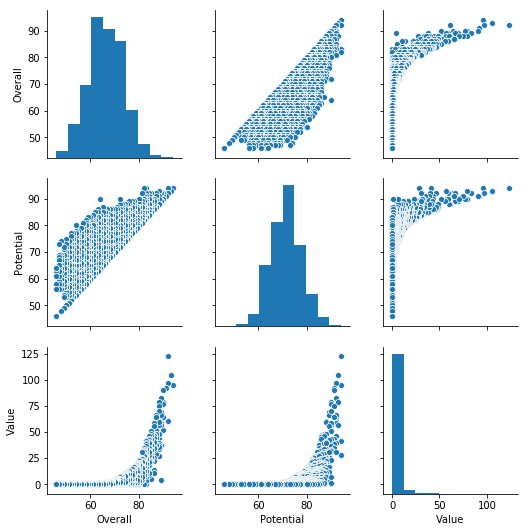

In [32]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

By default `pairplot` will return scatter plots in the main entries and a histogram in the diagonal. `pairplot` is oftentimes the first thing that a data scientist will throw at their data, and it works fantastically well in that capacity, even if sometimes the scatter-and-histogram approach isn't quite appropriate, given the data types.

# Examples

As in previous notebooks, let's now test ourselves by answering some questions about the plots we've used in this section. Once you have your answers, click on "Output" button below to show the correct answers.

1. Suppose that we create an `n` by `n` `FacetGrid`. How big can `n` get?
2. What are the two things about faceting which make it appealing?
3. When is `pairplot` most useful?

In [33]:
from IPython.display import HTML
HTML("""
<ol>
<li>You should try to keep your grid variables down to five or so. Otherwise the plots get too small.</li>
<li>It's (1) a multivariate technique which (2) is very easy to use.</li>
<li>Pair plots are most useful when just starting out with a dataset, because they help contextualize relationships within it.</li>
</ol>
""")

Next, try forking this kernel, and see if you can replicate the following plots. To see the answers, click the "Input" button to unhide the code and see the answers. Here's the dataset we've been working with:

In [34]:
import pandas as pd
import seaborn as sns

pokemon = pd.read_csv("../input/pokemon/Pokemon.csv", index_col=0)
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


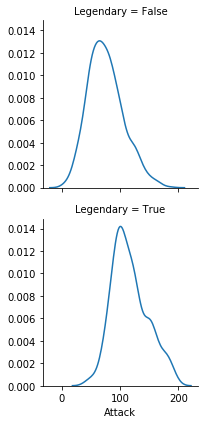

In [35]:
g = sns.FacetGrid(pokemon, row="Legendary")
g.map(sns.kdeplot, "Attack")

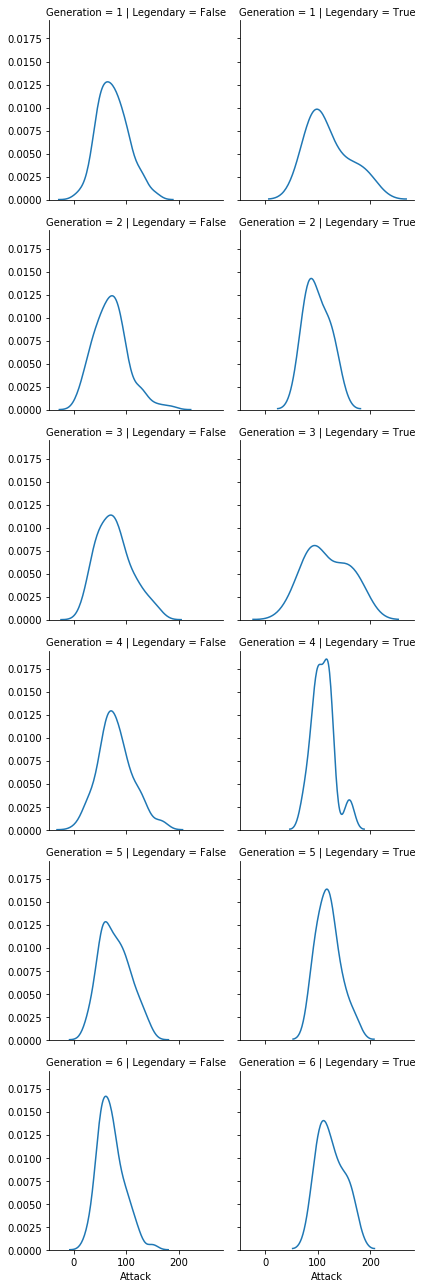

In [36]:
g = sns.FacetGrid(pokemon, col="Legendary", row="Generation")
g.map(sns.kdeplot, "Attack")

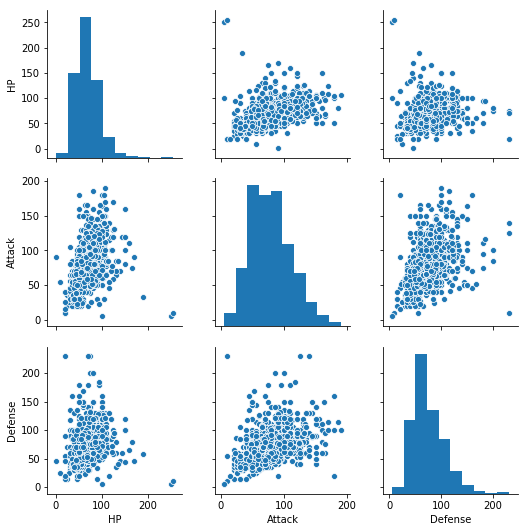

In [37]:
sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])

## Conclusion

In this notebook we explored `FacetGrid` and `pairplot`, two `seaborn` facilities for faceting your data, and discussed why faceting is so useful in a broad range of cases.

This technique is our first dip into multivariate plotting, an idea that we will explore in more depth with two other approaches in the next section.

[Click here to go to the next section, "Multivariate plotting"](https://www.kaggle.com/residentmario/multivariate-plotting).